# Make metaball objects
### evenly distributed cells on spheres/metaballs

In [1]:
%load_ext autoreload
%autoreload 1

import os

from joblib import Parallel, delayed

from rdmb import *
%aimport rdmb

# %matplotlib inline
%matplotlib notebook

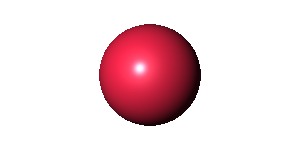

In [2]:
mbs1 = Metaballs(mth=0.6)
mbs1.append(Metaball(0, 0, 0, 0.88, 1))
mbs1.update()
display(rdmb.render_povray_mb(mbs1, width=300, height=150, angle=12))

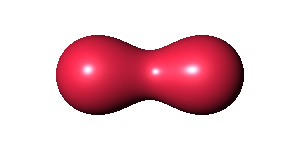

In [3]:
mbs2 = Metaballs(mth=0.6)
mbs2.append(Metaball(-0.96, 0, 0, 0.68, 1))
mbs2.append(Metaball(0.96, 0, 0, 0.68, 1))
mbs2.update()
display(rdmb.render_povray_mb(mbs2, width=300, height=150, angle=12))

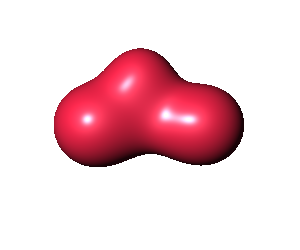

In [4]:
mbs3 = Metaballs(mth=0.6)
mbs3.append(Metaball(-0.96, 0, 0, 0.72, 1))
mbs3.append(Metaball(0.96, 0, 0, 0.68, 1))
mbs3.append(Metaball(-0.15, 0.9, 0, 0.36, 1))
mbs3.update()
display(rdmb.render_povray_mb(mbs3, width=300, height=250, angle=12))

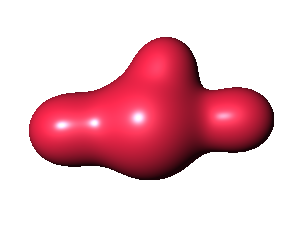

In [5]:
mbs4 = Metaballs(mth=0.6)
mbs4.append(Metaball(0, 0, 0, 0.96, 1))
mbs4.append(Metaball(-1.6, -0.1, 0, 0.45, 1))
mbs4.append(Metaball(1.7, 0.1, 0, 0.42, 1))
mbs4.append(Metaball(0.3, 1.1, 0, 0.30, 1))
mbs4.update()
display(rdmb.render_povray_mb(mbs4, width=300, height=250, angle=12))

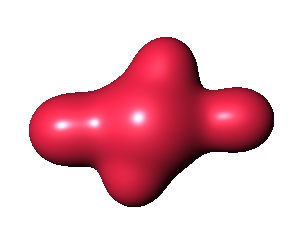

In [6]:
mbs5 = Metaballs(mth=0.6)
mbs5.append(Metaball(0, 0, 0, 0.96, 1))
mbs5.append(Metaball(-1.6, -0.1, 0, 0.45, 1))
mbs5.append(Metaball(1.7, 0.1, 0, 0.42, 1))
mbs5.append(Metaball(0.3, 1.1, 0, 0.30, 1))
mbs5.append(Metaball(-0.3, -1.0, 0, 0.28, 1))
mbs5.update()
display(rdmb.render_povray_mb(mbs5, width=300, height=250, angle=12))

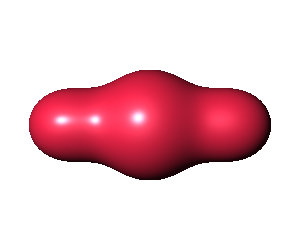

In [7]:
mbsq = Metaballs(mth=0.6)
mbsq.append(Metaball(-1.6, 0, 0, 0.45, 1))
mbsq.append(Metaball(1.6, 0, 0, 0.45, 1))
mbsq.append(Metaball(0, 0, 0, 0.96, 1))
mbsq.update()
display(rdmb.render_povray_mb(mbsq, width=300, height=250, angle=12))

In [8]:
rdmb_save_dir = "mbobj"

try:
    os.makedirs("./"+rdmb_save_dir)
except FileExistsError:
    pass

In [9]:
def run_make_mb_obj(fnbase, mbs, do_ite=False):
    np.random.seed(42)
    rdmb_save_dir = "mbobj"
    mb_obj_file = rdmb_save_dir + "/" + fnbase + ".obj.gz"

    vs = rdmb.make_mb_obj(mb_obj_file,
                          mbs,
                          mva=4e-4,
                          dt=1.0e-2,
                          max_ite=10000,
                          cv_end=0.08,
                          do_ite=do_ite)
    return vs

In [10]:
%%time

# make metaball_obj

fnbases = ["mb_1", "mb_2", "mb_3", "mb_4", "mb_5", "mb_hq"]
mbss = [mbs1, mbs2, mbs3, mbs4, mbs5, mbsq]

vss = Parallel(n_jobs=6, verbose=1, max_nbytes=None)(
        [delayed(run_make_mb_obj)(fnbase, mbs, do_ite=True)
         for fnbase, mbs in zip(fnbases, mbss)])


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:  1.7min remaining:  3.4min


CPU times: user 101 ms, sys: 105 ms, total: 206 ms
Wall time: 4min 4s


[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  4.1min finished


load mbobj/mb_1.obj.gz: 24851 cells


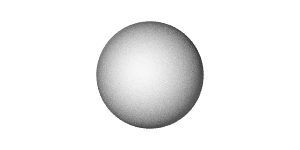

In [11]:
mbs, vs, *_ = rdmb.load_mb_obj("mbobj/mb_1.obj.gz")
display(rdmb.render_povray(vs,
                           width=300,
                           height=150,
                           angle=12,
                           antialiasing=0.001))

load mbobj/mb_2.obj.gz: 33474 cells


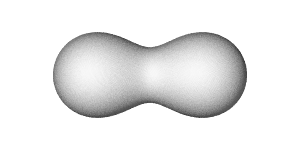

In [12]:
mbs, vs, *_ = rdmb.load_mb_obj("mbobj/mb_2.obj.gz")
display(rdmb.render_povray(vs,
                           width=300,
                           height=150,
                           angle=12,
                           antialiasing=0.001))

load mbobj/mb_3.obj.gz: 40086 cells


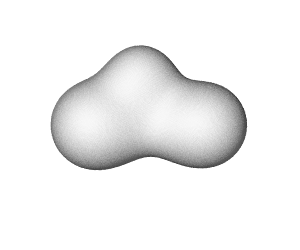

In [13]:
mbs, vs, *_ = rdmb.load_mb_obj("mbobj/mb_3.obj.gz")
display(rdmb.render_povray(vs,
                           width=300,
                           height=250,
                           angle=12,
                           antialiasing=0.001))

load mbobj/mb_4.obj.gz: 52813 cells


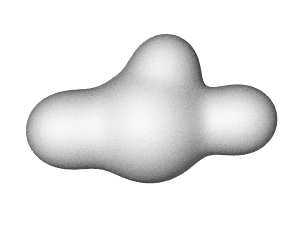

In [14]:
mbs, vs, *_ = rdmb.load_mb_obj("mbobj/mb_4.obj.gz")
display(rdmb.render_povray(vs,
                           width=300,
                           height=250,
                           angle=12,
                           antialiasing=0.001))

load mbobj/mb_5.obj.gz: 55660 cells


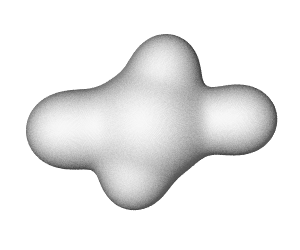

In [15]:
mbs, vs, *_ = rdmb.load_mb_obj("mbobj/mb_5.obj.gz")
display(rdmb.render_povray(vs,
                           width=300,
                           height=250,
                           angle=12,
                           antialiasing=0.001))

load mbobj/mb_hq.obj.gz: 49734 cells


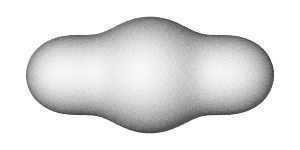

In [16]:
mbs, vs, *_ = rdmb.load_mb_obj("mbobj/mb_hq.obj.gz")
display(rdmb.render_povray(vs,
                           width=300,
                           height=150,
                           angle=12,
                           antialiasing=0.001))